# Week4授業課題 信用情報の学習

## 1.このテキストについて
<u>テキストの目的</u>  
・実データに近いものに対して機械学習を行う

<u>どのように学ぶか</u>  
Kaggleのデータセットを通じて、機械学習の基本的な流れやライブラリの使い方を学びます。

## 2.信用情報
Kaggleの Home Credit Default Risk コンペティションの学習および推定を行います。


[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

## 【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

<img src="https://t.gyazo.com/teams/diveintocode/f670fe8c4463d588543dd754022b641c.png" style="background-color:#FFFFFF;">


・何を学習し、何を予測するのか  
  ⇒ホームクレジット社がクライアントが返済できる確率を予測する。  
  
・どのようなファイルを作りKaggleに提出するか  
  ⇒test setの各SK_ID_CURRに対して、TARGET変数の確率を予測し、ヘッダー付きで以下のように提出する。  
        SK_ID_CURR,TARGET  
        100001, 0.1  
        100005, 0.9  
        100013, 0.2  
        etc.  
        
・提出されたものはどういった指標値で評価されるのか  
  ⇒area under the ROC curve(ROC曲線の下部領域)で評価される。

## 【問題2】学習と検証

データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。  


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。  
学習に用いる手法は指定しません。  

In [131]:
import pandas as pd
# データ読込
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [132]:
# 半分以上 欠損地を含む列を削除
drop_df = df_train.dropna(thresh=df.shape[0]*0.5, axis=1)

# 欠損地を含む行を削除
drop_df = drop_df.dropna(axis=0)

In [134]:
# ワンホットエンコーディング
df_one_hot_encoded = pd.get_dummies(drop_df)

In [135]:
# 相関係数の算出
df_corr = df_one_hot_encoded.corr()

In [136]:
# TARGETとの相関係数上位１０項目を抽出
df_corr["TARGET"].sort_values(ascending=False)

TARGET                                               1.000000
DAYS_EMPLOYED                                        0.067902
DAYS_BIRTH                                           0.061618
NAME_EDUCATION_TYPE_Secondary / secondary special    0.054697
REGION_RATING_CLIENT_W_CITY                          0.050473
                                                       ...   
NAME_EDUCATION_TYPE_Higher education                -0.058496
EXT_SOURCE_2                                        -0.152174
EXT_SOURCE_3                                        -0.169535
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
Name: TARGET, Length: 189, dtype: float64

In [137]:
# TARGETとの相関係数上位１０項目を抽出(相関関係の正負も考慮し、絶対値を取る)
abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index

Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI'],
      dtype='object')

In [138]:
# 上位１０項目で再度相関係数を出しなおす。
new_df = df_one_hot_encoded[abs(df_corr["TARGET"]).sort_values(ascending=False)[0:11].index]
new_df_corr = new_df.corr()
new_df_corr

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
TARGET,1.000000,-0.169535,-0.152174,0.067902,0.061618,-0.058496,0.054697,0.050473,0.048078,-0.046205,-0.046030
EXT_SOURCE_3,-0.169535,1.000000,0.118087,-0.125235,-0.179898,-0.005739,0.027195,-0.002365,-0.003040,0.003699,0.003985
EXT_SOURCE_2,-0.152174,0.118087,1.000000,-0.088711,-0.140273,0.110212,-0.095934,-0.284964,-0.295872,0.125559,0.124219
DAYS_EMPLOYED,0.067902,-0.125235,-0.088711,1.000000,0.348787,0.017198,-0.044498,-0.022239,-0.023906,0.003278,0.003263
DAYS_BIRTH,0.061618,-0.179898,-0.140273,0.348787,1.000000,0.077791,-0.134095,0.030587,0.032088,-0.013425,-0.013167
NAME_EDUCATION_TYPE_Higher education,-0.058496,-0.005739,0.110212,0.017198,0.077791,1.000000,-0.898646,-0.040935,-0.042366,0.140492,0.140034
NAME_EDUCATION_TYPE_Secondary / secondary special,0.054697,0.027195,-0.095934,-0.044498,-0.134095,-0.898646,1.000000,0.046928,0.047650,-0.141361,-0.140970
REGION_RATING_CLIENT_W_CITY,0.050473,-0.002365,-0.284964,-0.022239,0.030587,-0.040935,0.046928,1.000000,0.924737,-0.227591,-0.224935
REGION_RATING_CLIENT,0.048078,-0.003040,-0.295872,-0.023906,0.032088,-0.042366,0.047650,0.924737,1.000000,-0.212323,-0.209644
FLOORSMAX_AVG,-0.046205,0.003699,0.125559,0.003278,-0.013425,0.140492,-0.141361,-0.227591,-0.212323,1.000000,0.997143


In [139]:
new_df

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
0,1,0.139376,0.262949,-637,-9461,0,1,2,2,0.0833,0.0833
12,0,0.176653,0.715042,-2717,-13439,0,1,2,2,0.1667,0.1667
13,0,0.770087,0.566907,-3028,-14086,0,1,2,2,0.3333,0.3333
18,0,0.556727,0.706428,-7804,-17718,0,1,1,1,0.0833,0.0833
22,0,0.358951,0.457143,-4306,-11146,0,1,2,3,0.1667,0.1667
...,...,...,...,...,...,...,...,...,...,...,...
307495,0,0.597192,0.267834,-7438,-20922,1,0,2,2,0.3333,0.3333
307498,0,0.406617,0.746259,-3689,-19102,0,1,1,1,0.6667,0.6667
307508,0,0.218859,0.535722,-7921,-14966,1,0,3,3,0.1667,0.1667
307509,1,0.661024,0.514163,-4786,-11961,0,1,2,2,0.0417,0.0417


In [140]:
# 説明変数
new_df_X = new_df.iloc[:,1:11]
new_df_X

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
0,0.139376,0.262949,-637,-9461,0,1,2,2,0.0833,0.0833
12,0.176653,0.715042,-2717,-13439,0,1,2,2,0.1667,0.1667
13,0.770087,0.566907,-3028,-14086,0,1,2,2,0.3333,0.3333
18,0.556727,0.706428,-7804,-17718,0,1,1,1,0.0833,0.0833
22,0.358951,0.457143,-4306,-11146,0,1,2,3,0.1667,0.1667
...,...,...,...,...,...,...,...,...,...,...
307495,0.597192,0.267834,-7438,-20922,1,0,2,2,0.3333,0.3333
307498,0.406617,0.746259,-3689,-19102,0,1,1,1,0.6667,0.6667
307508,0.218859,0.535722,-7921,-14966,1,0,3,3,0.1667,0.1667
307509,0.661024,0.514163,-4786,-11961,0,1,2,2,0.0417,0.0417


In [141]:
# 説明変数
new_df_y = new_df.iloc[:,0]
new_df_y

0         1
12        0
13        0
18        0
22        0
         ..
307495    0
307498    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 84575, dtype: int64

In [142]:
import numpy as np
# ndarrayへ変換
X = np.array(new_df_X)
y = np.array(new_df_y)

In [143]:
from sklearn.model_selection import train_test_split
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [148]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

In [149]:
ss_X_train

array([[ 0.90951564,  0.8034728 , -0.21136896, ..., -1.85728587,
         3.10968153,  3.10436851],
       [-1.60897629,  0.68862201,  0.96894614, ..., -1.85728587,
         0.76325874,  0.76399704],
       [-0.33220085,  0.37145874, -1.05649254, ...,  0.025076  ,
         0.76325874,  0.76399704],
       ...,
       [ 1.29765871,  0.37077172,  0.23487262, ...,  0.025076  ,
         0.76325874,  0.76399704],
       [ 0.71897306, -2.01092381,  0.21731691, ...,  0.025076  ,
        -0.40924887, -0.40548672],
       [ 1.44814887, -0.26760363,  0.67009085, ...,  0.025076  ,
         0.47048373,  0.47197709]])

In [150]:
# 学習と推定
from sklearn.neighbors import KNeighborsClassifier
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(ss_X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
# 標準化済みのX_testで予測を行う。
y_pred = neigh5.predict(ss_X_test)
y_pred_proba = neigh5.predict_proba(ss_X_test)
y_pred_proba

array([[0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2]])

In [152]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

auc = metrics.auc(fpr, tpr)
auc

0.5838582313672303

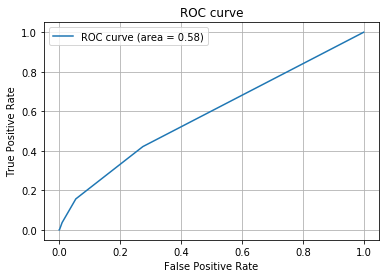

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### ＜線形回帰で学習してみる＞

In [223]:
# 学習と推定
from sklearn.linear_model import LinearRegression as LR
model_LR= LR()
model_LR.fit(ss_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
# LinearRegression
# 標準化済みのX_testで予測を行う。
y_pred_LR = model_LR.predict(ss_X_test)
y_pred_LR

array([0.12668419, 0.05017274, 0.11921024, ..., 0.09100943, 0.03578374,
       0.09768058])

In [225]:
# LinearRegression
fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, y_pred_LR, pos_label=1)

auc_LR = metrics.auc(fpr_LR, tpr_LR)
auc_LR

0.7333810650588392

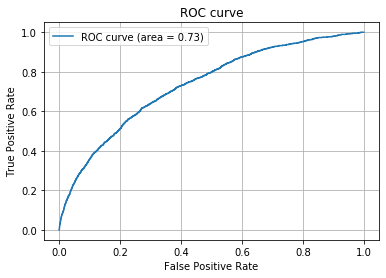

In [226]:
# LinearRegression
# ROC曲線をプロット
plt.plot(fpr_LR, tpr_LR, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [154]:
# ワンホットエンコーディング
df_one_hot_test = pd.get_dummies(df_test)

In [155]:
# 欠損地を平均値で穴埋め
df_test_submission = df_one_hot_test.fillna(df_one_hot_test.mean())

# 学習したものと同じカラム数に指定
df_test_submission = df_test_submission[abs(df_corr["TARGET"]).sort_values(ascending=False)[1:11].index]

In [222]:
df_test_submission

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
0,0.159520,0.789654,-2329,-19241,1,0,2,2,0.125000,0.125000
1,0.432962,0.291656,-4469,-18064,0,1,2,2,0.233706,0.233154
2,0.610991,0.699787,-4458,-20038,1,0,2,2,0.233706,0.233154
3,0.612704,0.509677,-1866,-13976,0,1,2,2,0.375000,0.375000
4,0.500106,0.425687,-2191,-13040,0,1,2,2,0.233706,0.233154
...,...,...,...,...,...,...,...,...,...,...
48739,0.643026,0.648575,-5169,-19970,0,1,3,3,0.233706,0.233154
48740,0.500106,0.684596,-1149,-11186,0,1,2,2,0.233706,0.233154
48741,0.283712,0.632770,-3037,-15922,0,1,2,2,0.333300,0.333300
48742,0.595456,0.445701,-2731,-13968,1,0,2,2,0.625000,0.625000


In [156]:
# ndarrayへ変換
X_submission = np.array(df_test_submission)

In [157]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss_sub = StandardScaler()
ss_sub.fit(X_submission)
ss_X_submission = ss_sub.transform(X_submission)


### ＜k-nnで推定＞

In [158]:
# 標準化済みのX_testで予測を行う。(k-nnで推定)
y_submission = neigh5.predict(ss_X_submission)
y_submission_proba = neigh5.predict_proba(ss_X_submission)
y_submission_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [159]:
y_submission_proba.shape

(48744, 2)

In [160]:
df_submission = pd.DataFrame(y_submission_proba)
df_submission = pd.concat([df_test.iloc[:,0], df_submission.iloc[:,1]], axis = 1)

In [161]:
df_submission.columns = ["SK_ID_CURR","TARGET"]

In [162]:
df_submission

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0
...,...,...
48739,456221,0.0
48740,456222,0.0
48741,456223,0.0
48742,456224,0.0


In [107]:
# 提出ファイルの作成
df_submission.to_csv("submission.csv", index = False)

k-nnでの投稿結果：Score=0.57719

### ＜線形回帰で推定＞

In [227]:
# 標準化済みのX_testで予測を行う。(線形回帰で推定)
y_sub_LR = model_LR.predict(ss_X_submission)
y_sub_LR

array([ 0.08873973,  0.12983677, -0.00729952, ...,  0.1032637 ,
        0.01928826,  0.14227219])

In [230]:
# 変数バックアップ
y_submit = y_sub_LR

In [231]:
# 0以下の値は0に置換
y_submit = np.where(y_submit < 0, 0, y_submit)

In [228]:
df_sub_LR

,0
0,0.088740
1,0.129837
2,-0.007300
3,0.046658
4,0.095306
...,...
48739,0.024314
48740,0.053594
48741,0.103264
48742,0.019288


In [232]:
y_submit

array([0.08873973, 0.12983677, 0.        , ..., 0.1032637 , 0.01928826,
       0.14227219])

In [233]:
df_sub_LR = pd.DataFrame(y_submit)
df_submission_LR = pd.concat([df_test.iloc[:,0], df_sub_LR], axis = 1)

In [234]:
df_submission_LR.columns = ["SK_ID_CURR","TARGET"]

In [235]:
df_submission_LR

,SK_ID_CURR,TARGET
0,100001,0.088740
1,100005,0.129837
2,100013,0.000000
3,100028,0.046658
4,100038,0.095306
...,...,...
48739,456221,0.024314
48740,456222,0.053594
48741,456223,0.103264
48742,456224,0.019288


In [237]:
# 提出ファイルの作成
df_submission_LR.to_csv("sub_LR.csv", index = False)

LinearRegressionでの投稿結果：Score=0.69322

## 4.特徴量エンジニアリング
ベースラインモデルを元に、入力する特徴量に様々な工夫を行い精度を向上させていきます。

## 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


・どの特徴量を使うか  
・どう前処理をするか  

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

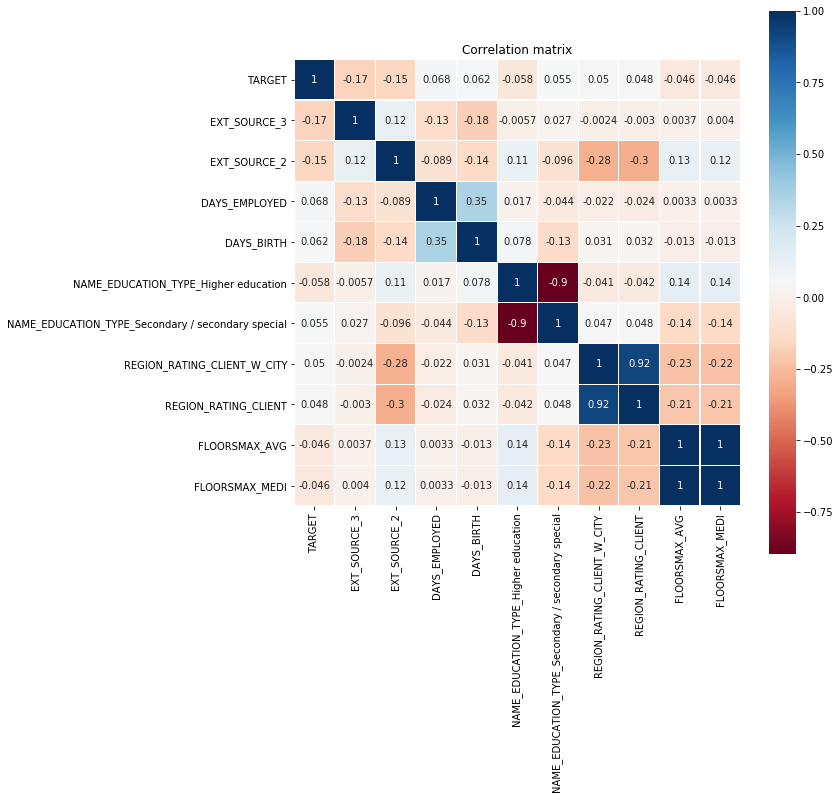

In [163]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix')
sns.heatmap(new_df_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.ylim(new_df_corr.shape[0], 0,)
plt.show()

特徴量エンジニアリングとしては、  
・外れ値に頑健な標準化（RobustScaler）  
・正規化  
・多重共線性の排除（特徴量の削除）  
・ラッソ回帰  
・リッジ回帰  
等

以下に順次実行する。

### ＜外れ値に頑健な標準化（RobustScaler）＞

In [206]:
# 標準化
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
RS.fit(X_train)
RS_X_train = RS.transform(X_train)
RS_X_test = RS.transform(X_test)

In [207]:
# 学習と推定
RS_model_LR= LR()
RS_model_LR.fit(RS_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
# 標準化済みのX_testで予測を行う。
RS_y_pred_LR = RS_model_LR.predict(RS_X_test)
RS_y_pred_LR

array([0.12668419, 0.05017274, 0.11921024, ..., 0.09100943, 0.03578374,
       0.09768058])

In [210]:
# LinearRegression
RS_fpr_LR, RS_tpr_LR, RS_thresholds = metrics.roc_curve(y_test, RS_y_pred_LR, pos_label=1)

RS_auc_LR = metrics.auc(RS_fpr_LR, RS_tpr_LR)
RS_auc_LR

0.7333810650588392

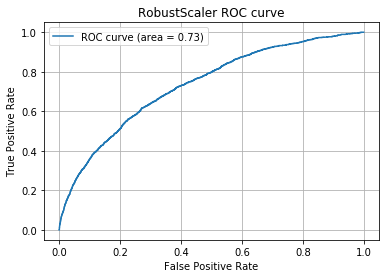

In [211]:
# LinearRegression
# ROC曲線をプロット
plt.plot(RS_fpr_LR, RS_tpr_LR, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('RobustScaler ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### ＜多重共線性の排除（特徴量の削除）＞

多重共線性を排除する。

上記のヒートマップから
①DAYS_EMPLOYEDとDAYS_BIRTHの強い正の相関がある。　
　⇒　DAYS_EMPLOYEDを削除
②NAME_EDUCATION_TYPEの“Higher education(高等教育)”と”Secondary / secondary special(中等教育)”に強い負の相関がある。
　⇒"NAME_EDUCATION_TYPE_Secondary / secondary special(中等教育)"を削除  
③REGION_RATING_CLIENTとREGION_RATING_CLIENT_W_CITYの強い正の相関がある。
 ⇒REGION_RATING_CLIENT_W_CITYを削除する。
④FLOORSMAX_MEDIとFLOORSMAX_AVGの強い正の相関がある。
 ⇒FLOORSMAX_MEDIを削除する。

In [245]:
# 変数のバックアップ
drop_data = new_df_X
    
drop_data = drop_data.drop('DAYS_EMPLOYED', axis=1)
drop_data = drop_data.drop('NAME_EDUCATION_TYPE_Secondary / secondary special', axis=1)
drop_data = drop_data.drop('REGION_RATING_CLIENT_W_CITY', axis=1)
drop_data = drop_data.drop('FLOORSMAX_MEDI', axis=1)

In [246]:
drop_data

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,REGION_RATING_CLIENT,FLOORSMAX_AVG
0,0.139376,0.262949,-9461,0,2,0.0833
12,0.176653,0.715042,-13439,0,2,0.1667
13,0.770087,0.566907,-14086,0,2,0.3333
18,0.556727,0.706428,-17718,0,1,0.0833
22,0.358951,0.457143,-11146,0,3,0.1667
...,...,...,...,...,...,...
307495,0.597192,0.267834,-20922,1,2,0.3333
307498,0.406617,0.746259,-19102,0,1,0.6667
307508,0.218859,0.535722,-14966,1,3,0.1667
307509,0.661024,0.514163,-11961,0,2,0.0417


In [247]:
# ndarrayへ変換
X = np.array(drop_data)
y = np.array(new_df_y)

In [248]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [249]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(X_train)
ss2_X_train = ss2.transform(X_train)
ss2_X_test = ss2.transform(X_test)

In [250]:
# 学習と推定
from sklearn.linear_model import LinearRegression as LR
model_LR2= LR()
model_LR2.fit(ss2_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
# LinearRegression
# 標準化済みのX_testで予測を行う。
y_pred_LR2 = model_LR2.predict(ss2_X_test)
y_pred_LR2

array([ 0.177031  ,  0.1271697 ,  0.13710869, ...,  0.09824178,
        0.17845004, -0.00473719])

In [253]:
# LinearRegression
fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, y_pred_LR, pos_label=1)

auc_LR = metrics.auc(fpr_LR, tpr_LR)
auc_LR

0.49513164337423443

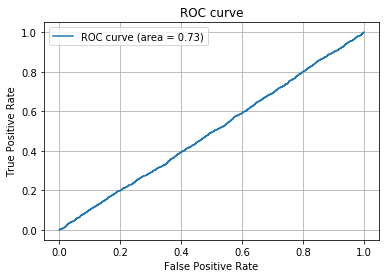

In [254]:
# LinearRegression
# ROC曲線をプロット
plt.plot(fpr_LR, tpr_LR, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### ＜Lasso回帰：L1正則化＞

In [187]:
from sklearn.linear_model import Lasso
# モデル関数を作成
lasso = Lasso()

# 学習
lasso.fit(ss_X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [267]:
# 標準化済みのss_X_testで予測を行う。
y_pred_losso = lasso.predict(ss_X_test)


In [268]:
fpr_losso, tpr_losso, thresholds_losso = metrics.roc_curve(y_test, y_pred_losso, pos_label=1)

auc_losso = metrics.auc(fpr_losso, tpr_losso)

auc_losso

0.5

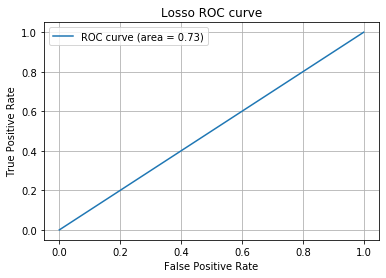

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

# ROC曲線をプロット
plt.plot(fpr_losso, tpr_losso, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('Losso ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### ＜Ridge回帰：L2正則化＞

In [191]:
from sklearn.linear_model import Ridge
# モデル関数を作成
ridge = Ridge()

# 学習
ridge.fit(ss_X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [192]:
# 標準化済みのX_testで予測を行う。
y_pred_ridge = ridge.predict(ss_X_test)

In [193]:
fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test, y_pred_ridge, pos_label=1)

auc_ridge = metrics.auc(fpr_ridge, tpr_ridge)

auc_ridge

0.7333813256861796

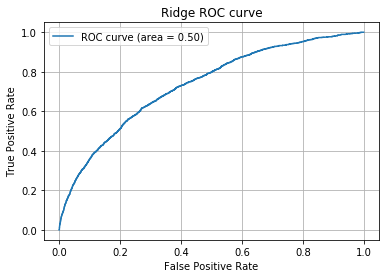

In [194]:
# ROC曲線をプロット
plt.plot(fpr_ridge, tpr_ridge, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('Ridge ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

以上の結果をまとめると、

| No. | 手法                         | 標準化         | AUC         | 順位 |
|-----|------------------------------|----------------|-------------|------|
| 1   | k-nn                         | StandardScaler | 0.583858231 | 4    |
| 2   | 線形回帰                     | StandardScaler | 0.733381065 | 2    |
| 3   | 線形回帰                     | RobustScaler   | 0.733381065 | 3    |
| 4   | Lasso                        | StandardScaler | 0.5         | 5    |
| 5   | Ridge                        | StandardScaler | 0.733381326 | 1    |
| 6   | 多重共線性の排除（線形回帰） | StandardScaler | 0.495131643 | 6    |

といった結果になり、Ridge回帰：L2正則化が一番高い値となった。  
多重共線性の排除では、カラムが減ったため、精度が下がった可能性がある。
以上から、Ridge回帰でKaggleに投稿してみる。

In [263]:
# 標準化済みのss_X_testで予測を行う。(リッジ回帰で推定)
y_sub_ridge = ridge.predict(ss_X_submission)
y_sub_ridge

array([ 0.08873931,  0.12983574, -0.00729883, ...,  0.10326316,
        0.01928821,  0.14227115])

In [264]:
# 0以下の値は0に置換
y_sub_ridge = np.where(y_sub_ridge < 0, 0, y_sub_ridge)
y_sub_ridge

array([0.08873931, 0.12983574, 0.        , ..., 0.10326316, 0.01928821,
       0.14227115])

In [265]:
df_sub_ridge = pd.DataFrame(y_sub_ridge)
df_submission_ridge = pd.concat([df_test.iloc[:,0], df_sub_ridge], axis = 1)

df_submission_ridge.columns = ["SK_ID_CURR","TARGET"]

In [266]:
# 提出ファイルの作成
df_submission_ridge.to_csv("sub_ridge.csv", index = False)

Kaggleへの提出結果は：score=0.69322であり精度が低下した。